In [1]:
# Import modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def phi_func(index, phase_angle):
    """
    Phase function that is needed for the reduced magnitude. The function has
    two versions, depending on the index ('1' or '2').

    Parameters
    ----------
    index : str
        Phase function index / version. '1' or '2'.
    phase_angle : float
        Phase angle of the asteroid in radians.

    Returns
    -------
    phi : float
        Phase function result.

    """

    # Dictionary that contains the A and B constants, depending on the index /
    # version
    a_factor = {'1': 3.33, \
                '2': 1.87}

    b_factor = {'1': 0.63, \
                '2': 1.22}

    # Phase function
    phi = np.exp(-1.0 * a_factor[index] \
                 *+ ((np.tan(0.5 * phase_angle) ** b_factor[index])))

    # Return the phase function result
    return phi

In [3]:
def red_mag(abs_mag, phase_angle, slope_g):
    """
    Reduced magnitude of an asteroid, depending on the absolute magnitude,
    phase angle and slope parameter (G)

    Parameters
    ----------
    abs_mag : float
        Absolute magnitude.
    phase_angle : float
        Phase angle in radians.
    slope_g : float
        Slope parameter (G), between 0 and 1.

    Returns
    -------
    r_mag : float
        Reduced magnitude.

    """

    # Computation of the reduced magnitude
    r_mag = abs_mag - 2.5 * np.log10((1.0 - slope_g) \
                                     * phi_func(index='1', \
                                                phase_angle=phase_angle) \
                                     + slope_g \
                                     * phi_func(index='2', \
                                                phase_angle=phase_angle))

    # Return the reduced magnitude
    return r_mag

In [4]:
def app_mag(abs_mag, phase_angle, slope_g, d_ast_sun, d_ast_earth):
    """
    Apparent / Visual magnitude of an asteroid (not considering atmospheric
    attenuation), depending on the absolute magnitude, phase angle, the slope
    parameter (G) as well as the distance between the asteroid and Earth,
    respectively the Sun

    Parameters
    ----------
    abs_mag : float
        Absolute magnitude.
    phase_angle : float
        Phase angle in radians.
    slope_g : float
        Slope parameter (G).
    d_ast_sun : float
        Distance between the asteroid and the Sun in AU.
    d_ast_earth : float
        Distance between the asteroid and the Earth in AU.

    Returns
    -------
    mag : float
        Apparent / visual magnitude.

    """

    # Compute the apparent / visual magnitude
    mag = red_mag(abs_mag, phase_angle, slope_g) \
          + 5.0 * np.log10(d_ast_sun * d_ast_earth)

    # Return the apparent magnitude
    return mag

In [5]:
# Let's set some values that correspond approximately with the values of
# the dwarf planet Ceres: https://ssd.jpl.nasa.gov/sbdb.cgi?sstr=Ceres
# Set hard-coded distances between the Earth-Sun and Asteroid-Sun in AU
D_EARTH_SUN = 1.0
D_AST_SUN = 3.0

# Set hard-coded values for the absolute magnitude and slope parameter G
ABS_MAG_SAMPLE = 3.4
SLOPE_G_SAMPLE = 0.12

# Set an array with the phase angles between 0 and 45 degrees (convert to
# radians), as seen from the Sun (between Earth and Asteroid)
ANG_EARTH_AST_ORG_SUN = np.radians(np.linspace(0, 45, 1000))

# Compute the distance between the Earth and the Asteroid depending on the
# phase angle
D_AST_EARTH = np.sqrt(D_EARTH_SUN**2.0 + D_AST_SUN**2.0 \
                      - 2.0 * D_EARTH_SUN * D_AST_SUN \
                      * np.cos(ANG_EARTH_AST_ORG_SUN))

# Compute the corresponding phase angle as seen from the asteroid
# (between the Sun and Earth)
PHASE_ANG_AST = np.arcsin((D_EARTH_SUN * np.sin(ANG_EARTH_AST_ORG_SUN))
                          / (D_AST_EARTH))

# Compute now the apparent / visual magnitude of the body
APP_MAG_SAMPLE = app_mag(abs_mag=ABS_MAG_SAMPLE, \
                         phase_angle=PHASE_ANG_AST, \
                         slope_g=SLOPE_G_SAMPLE, \
                         d_ast_sun=D_AST_SUN, \
                         d_ast_earth=D_AST_EARTH)

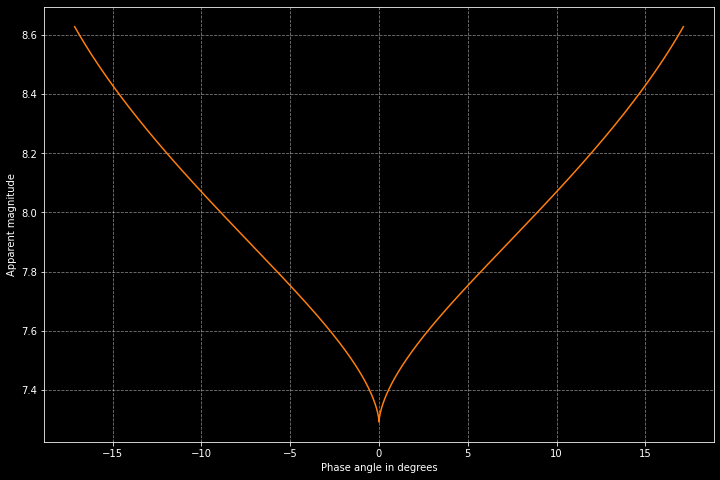

In [6]:
# Let's plot the results:
# Use a dark background
plt.style.use('dark_background')

# Set a figure
plt.figure(figsize=(12, 8))

# To visualise possible effects a little bit better, let's plot the
# magnitude vs. the phase angle and mirror the phase angle results.
# The resulting "negative phase angles" are mathematically not correct!
plt.plot(np.concatenate((-1.0*np.degrees(PHASE_ANG_AST[::-1]), \
                         np.degrees(PHASE_ANG_AST))), \
         np.concatenate((APP_MAG_SAMPLE[::-1], APP_MAG_SAMPLE)), \
         color='tab:orange')

# Set a grid
plt.grid(True, linestyle='dashed', alpha=0.5)

# Get the axes
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain')

# Set the labels for the x and y axes
plt.xlabel('Phase angle in degrees')
plt.ylabel('Apparent magnitude')

# Save the figure
plt.savefig('app_mag_asteroid.png', dpi=300)